# Project


-  THE dataset is about an Insurance company that has provided Health Insurance to its customers.
-  The model is to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.<br>
<br>
-  In order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Annual Premium, sourcing channel) etc.<br>
<br>

[Vehicle Data](#section~title)

__[click here for data](https://www.kaggle.com/anmolkumar/vehicle-insurance-eda-lgbm-vs-catboost-85-83/data?select=cross_sell_v8.csv)__

# <font color='red'>Importing Libararies.</font> 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# <font color='red'>Dataset Reading</font>

In [5]:
data=pd.read_csv(r'C:\Users\Lenovo\OneDrive\Desktop\competition\vehicle data.csv')

# <font color='red'> </font>

In [6]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


# <font color='red'> Basic details of the dataset </font>

## <font color='Brown'>Dimension of set. </font>

In [7]:
data.shape

(381109, 12)

The vehicle data contains of 381109 rows and 12 columns.

## <font color='Brown'>Information about data</font>

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


## <font color='Brown'>Statistics of Data Set. </font> 

In [12]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## <font color='brown'> Data type in Vehicle data.</font>

In [12]:
data.dtypes

id                       int64
Gender                  object
Age                      int64
Driving_License          int64
Region_Code              int64
Previously_Insured       int64
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Vintage                  int64
Response                 int64
dtype: object

# <font color='red'>Preprocessing</font>

## <font color='Gold'>1.Missing value handling</font>

In [8]:
data.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Since no missing values. we can proceed the this data set for further ML algorithm.

## <font color='gold'>2.Outlier detection and handling</font>

### Plotting BoxPlot Of All Continous Features

<AxesSubplot:>

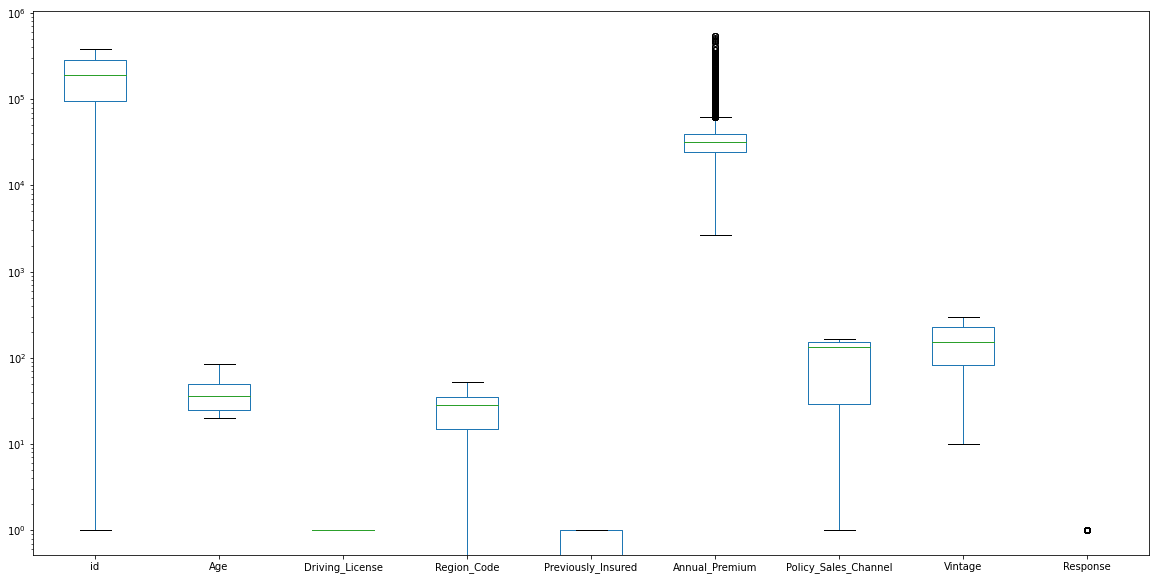

In [9]:
data.plot(kind='box', figsize=(20, 10), logy=True)

**Interpretation**
Attendtion requried since the there is outliers in 'Annual_Premium'.

### Finding Quartile Values

In [13]:
Q1=np.percentile(data['Annual_Premium'],25,interpolation='midpoint')
Q2=np.percentile(data['Annual_Premium'],50,interpolation='midpoint')
Q3=np.percentile(data['Annual_Premium'],75,interpolation='midpoint')

print("The first quartile is:-", Q1)
print("The second quartile is:-", Q2)
print("The third quartile is:-", Q3)

The first quartile is:- 24405.0
The second quartile is:- 31669.0
The third quartile is:- 39400.0


### Inter Quartile Range

In [14]:
IQR=Q3-Q1
print('The IQR is :-', IQR)

The IQR is :- 14995.0


### Finding the Range Where the Annual Premium Values Lies

In [15]:
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print('The lower limit of annula premium is:-', low_limit)
print('The upper limit of anulla premium is:-', up_limit)

The lower limit of annula premium is:- 1912.5
The upper limit of anulla premium is:- 61892.5


**Interpretation**
Already know we have outliers, that is the values less than 1912.5 and values greater than 61892.5 are outliers.<br>

### Find the Actual Values of Annual Premium

In [13]:
data['Annual_Premium'][data['Annual_Premium']>up_limit] = up_limit
data['Annual_Premium'][data['Annual_Premium']<low_limit] = low_limit

### Boxplot Without Outliers

<AxesSubplot:xlabel='Annual_Premium'>

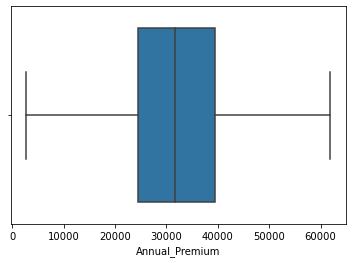

In [14]:
sns.boxplot(data['Annual_Premium'],orient='h')

# <font color='Red'>Encoding</font>

## <font color='purple'>Creating Function To Retrieve Catogories From Catogorical Columns</font>

In [17]:
def get_uniques(data, columns):
    return {column: list(data[column].unique()) for column in columns}

In [18]:
categorical_features = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [19]:
get_uniques(data, categorical_features)

{'Gender': ['Male', 'Female'],
 'Vehicle_Age': ['> 2 Years', '1-2 Year', '< 1 Year'],
 'Vehicle_Damage': ['Yes', 'No']}

**Definition**<br>
Which is clear that the Geneder has binary categorical value such as Male and Female.<br>
Similarlly in vehicle_Damage has two categorical variable such as 'yes' or 'No.<br>
Also in 'Vehicle_Age' variable has more than two categories, such as ">2years", "1-2years" and "< 1 years".

### Binary Featuring.

In [22]:
binary_features = ['Gender', 'Vehicle_Damage']

### Ordinal Featueing.

Since we have more than 2 categorical values in column we have to use Ordinal featuring instead of Binary featuring.

In [21]:
ordinal_features = ['Vehicle_Age']

### Creating A Function For Binary Encoding

In [23]:
def binary_encode(data, column, positive_label):
    data = data.copy()
    data[column] = data[column].apply(lambda x: 1 if x == positive_label else 0)
    return data

In [24]:
data = binary_encode(data, 'Gender', 'Male')
data = binary_encode(data, 'Vehicle_Damage', 'Yes')

### Creating A function For Ordinal Encoding

In [25]:
def ordinal_encode(data, column, ordering):
    data = data.copy()
    data[column] = data[column].apply(lambda x: ordering.index(x))
    return data

In [26]:
age_ordering = ['< 1 Year', '1-2 Year', '> 2 Years']
data = ordinal_encode(data, 'Vehicle_Age', age_ordering)

In [27]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,2,1,40454,26,217,1
1,2,1,76,1,3,0,1,0,33536,26,183,0
2,3,1,47,1,28,0,2,1,38294,26,27,1
3,4,1,21,1,11,1,0,0,28619,152,203,0
4,5,0,29,1,41,1,0,0,27496,152,39,0


## <font color='purple'> Splitting data into X and Y variables</font>

In [31]:
X=data.drop(['id','Response'],axis=1)
Y=data['Response'] 

### <font color='purple'> Splitting the data into Training data and Testing data </font>

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42) 
print('The shape of independent training data', X_train.shape,' & the shape of independent testing data set is', X_test.shape)

The shape of independent training data (266776, 10)  & the shape of independent testing data set is (114333, 10)


# <font color='Red'>Exploratory Data Analysis</font>


### <font color='Green'>Histogram for various variables over counts.</font>

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

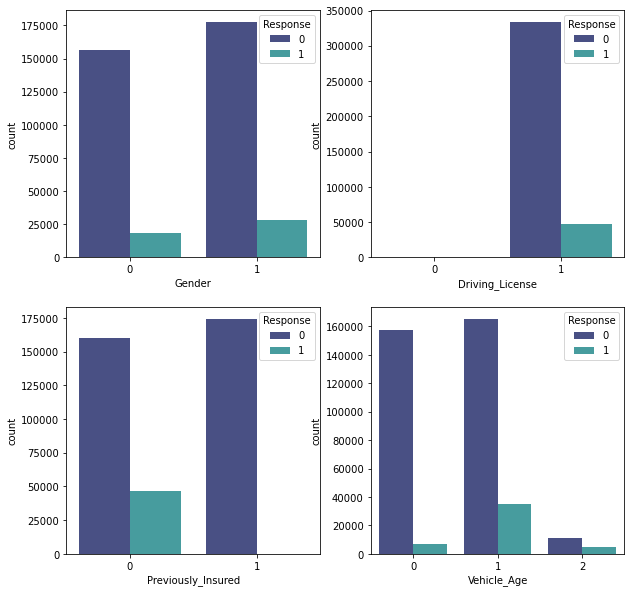

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10)) 
sns.countplot(ax=axes[0,0],x='Gender',hue='Response',data=data,palette="mako") 
sns.countplot(ax=axes[0,1],x='Driving_License',hue='Response',data=data,palette="mako") 
sns.countplot(ax=axes[1,0],x='Previously_Insured',hue='Response',data=data,palette="mako") 
sns.countplot(ax=axes[1,1],x='Vehicle_Age',hue='Response',data=data,palette="mako")

**Interpretation**<br>
When speaking of response variable, 0 represents that the vehicle onwer are willing to buy the insurance for vehicle and so 1 for those who are not willing to buy a insurance.<br>
The count histogram for 'Gender' variable indicates that the more onwers of vehicles are male and also male onwers have more tendency to buy a insurance for thier vehicle.<br> 
The histogram for 'Driving_lisence' indicates that those who have license and almost 90% of them are willing to buy a insurance. and almost 50000 of onwers those who have license are not willing to buy insurance. And some of the onwers who doesn't have license are also willing buy a insurance.<br>
The histogram for 'Previously_Insured' indicates that the almost 75% of the onwers those who hasn't previously insurured are now willing to take new insurance polices and those who have previously insured  the vehicle are still going the same way.<br>
The histogram for 'Vehicle_age' deplicts that vehicle data more vehicles has age between 1 and 2 years and only less vehicle has age greater than 2. Asusally the most of all new vehicle onwers are villing to take a insurance when comparing to the others,eventually those who are willing to buy insurance in still slightly high for the 2nd group since this group has more no of onwers than any other groups.<br>


### <font color='green'> Nomal  plot fot Age variable.</font>

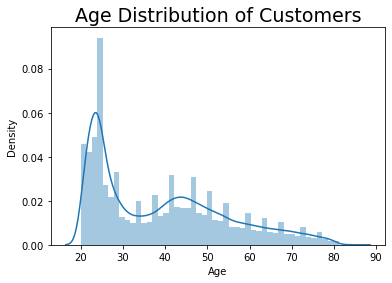

In [48]:
sns.distplot(data.Age)
plt.title('Age Distribution of Customers',fontsize=19)
plt.show()

**Conclusion**

Firstly the distribution is multimodal. And technically speaking this is a positively or right skewed data. Already we know that the mean of 'Age' is aproximately 38 and median of the 'Age' is 36 and while analysing the above plot that we can say the mode will lies inbetween the 23 and 30. So while comparing these value also (that is mode < median < mean) the data is positively skewed and most of all values is lies between 20 and 50, which mean most of all onwers age is between this 20 and 50.



### <font color='green'>Scatter plot between Age and Annual Premium</font>

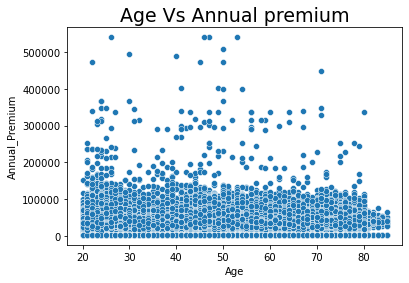

In [53]:
sns.scatterplot(x=data['Age'],y=data['Annual_Premium'])
plt.title('Age Vs Annual premium',fontsize=19)
plt.show()

**Conclusion**

We can conclude that the from those who have are between 20 to 80 equaly prefers for the insuranc which has annual premium value is less than 100000 and for those who prefer the insurance has premium value greater than 200000 will exponential decreasing from age 20 to 80 and more.



### <font color='Green'> Categorical Plot for Gender v/s Driving License.</font>

Text(0.5, 1.0, 'Driving license by Gender')

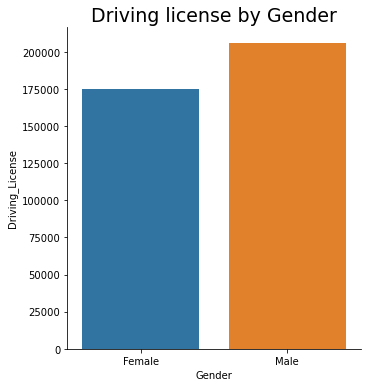

In [64]:
df=data.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
sns.catplot(x="Gender", y="Driving_License",
                data=df, kind="bar");
plt.title('Driving license by Gender',fontsize=19)
plt.show()

**Conclusion**

In Female Catogory Around 175000 People Have Driving Licence. And, More Than 2Lakh Males Have Driving Licence 


### <font color='green'>Plotting Histogram Of Each Column In The Dataset</font>

<function matplotlib.pyplot.show(close=None, block=None)>

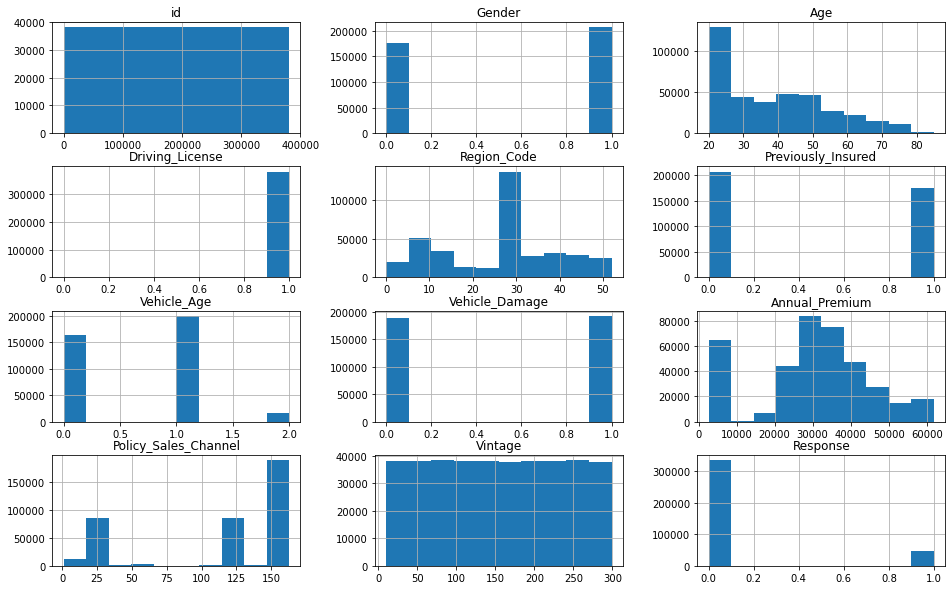

In [27]:
data.hist(figsize=(16,10))
plt.show

Since some of the variables are descibed deeply earlier and other histograms for id, vintage are completely meaning less if interpreting using the respective hist of those variables.



### <font color='green'> Plotting Count Plot Of Variable Vehicle Age With Respect to Responce</font>

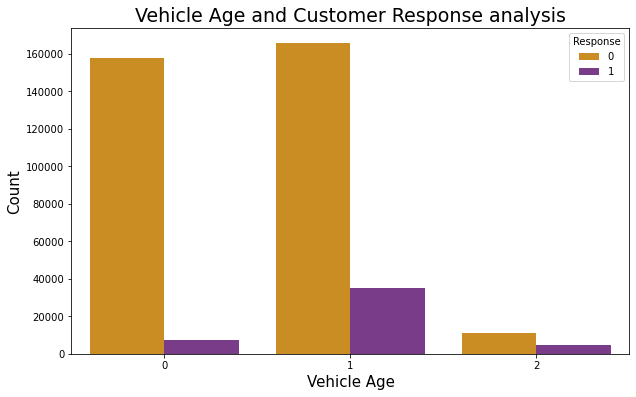

In [28]:
plt.figure(figsize = (10,6) )
sns.countplot(data =data, x = 'Vehicle_Age', hue = 'Response', palette='CMRmap_r')
plt.xlabel('Vehicle Age', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Vehicle Age and Customer Response analysis', fontsize = 19)
plt.show()

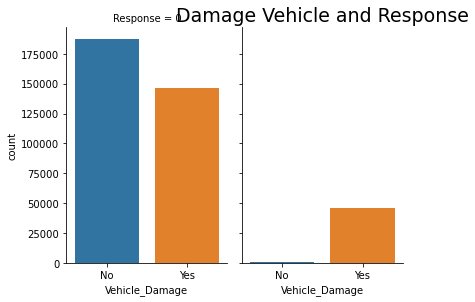

In [75]:
#Damage Vehicle and Response
df=data.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
sns.catplot(x="Vehicle_Damage", y="count",col="Response", data=df, kind="bar",height=4, aspect=.7);
plt.title('Damage Vehicle and Response', fontsize = 19)
plt.show()

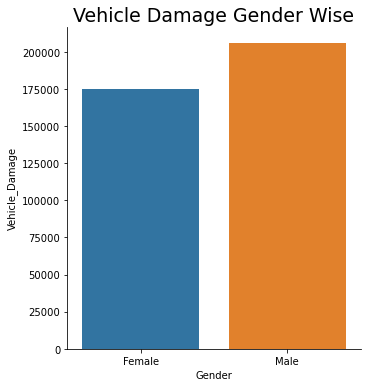

In [63]:
# Plot Of Vehicle Damage Gender Wise
df2=data.groupby(['Gender'])['Vehicle_Damage'].count().to_frame().reset_index()
sns.catplot(x="Gender", y="Vehicle_Damage",data=df2, kind="bar");
plt.title('Vehicle Damage Gender Wise', fontsize = 19)
plt.show()

**Conclusion**

Male Having Damaged Vehicle is More than Female's

### <font color='green'>Function For Percentage Value.</font>

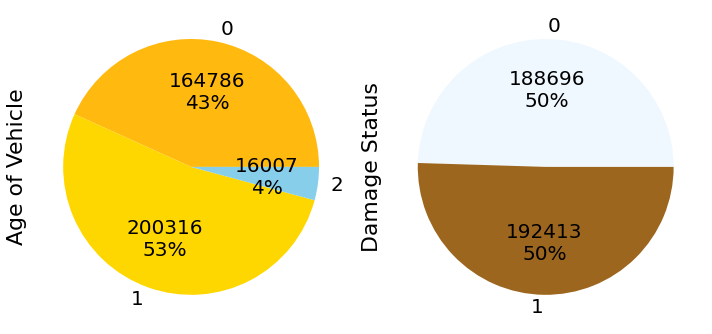

In [30]:
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'

#Plotting Some Pie Charts about Age Of Vehicle , Damage Status
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

data.groupby('Vehicle_Age').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['#FFB90F', 'gold', 'skyblue'], ax=ax1)
data.groupby('Vehicle_Damage').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                 colors=['#F0F8FF', '#9C661F'], ax=ax2)
ax1.set_ylabel('Age of Vehicle', size=22)
ax2.set_ylabel('Damage Status', size=22)
plt.tight_layout()
plt.show()

**Interpretation**
As we already mentioned that most of vehicles in this data has age between 1 and 2 years. So, now we can clearly validate the statement using the respective percentage that 53% of vehicles age in the data between 1 and 2 years and 43% of vehcles age in this data less than 1 year and only 4% of vehicles have age greater than 3.<br>

The second pie chart states that the vehicles has damaged and vehicles doesn't have any damages is almost equal. but in number vehicle with no damges are slighly high.


### <font color='green'>Plot A Graph About People who have Vehicle Insurance Already</font>

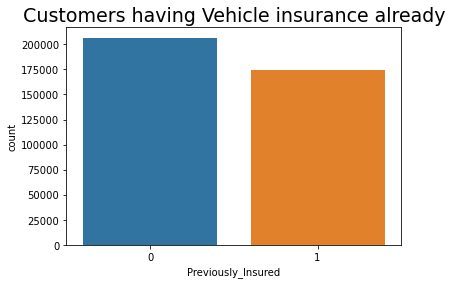

In [66]:
plt.title('Customers having Vehicle insurance already',fontsize=19)
sns.countplot(data.Previously_Insured)
plt.show()

### <font color='green'>Correlation Matrix of Vehicle data.</font>

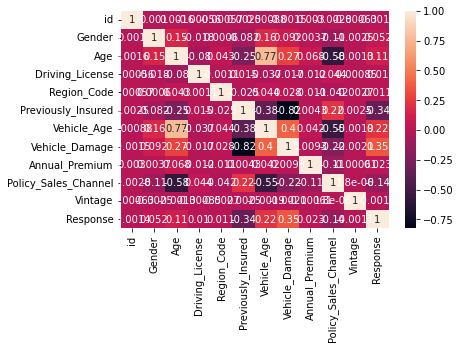

In [37]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot = True)
plt.show()
figsize=(15,12)

# <font color='Red'>Data Modelling and Evaluation</font>

## <font color='grey'>Import Neccessary Libraries</font>

In [45]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

## <font color='grey'>LOGISTIC REGRESSION MODEL </font>

In [39]:
logit_model=LogisticRegression()
logit_model.fit(X_train,Y_train)
Y_pred = logit_model.predict(X_test)

In [40]:
print('Accuracy is  :',accuracy_score(Y_test,Y_pred))
print('precision is  :',precision_score(Y_test,Y_pred))
print('Recall is  :',recall_score(Y_test,Y_pred))
print('f1 score :',f1_score(Y_test,Y_pred))

Accuracy is  : 0.8763436628095126
precision is  : 0.0
Recall is  : 0.0
f1 score : 0.0


## <font color='grey'>Performimg Min Max Scaling in Annual Premium</font>

In [41]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
data[['Annual_Premium']] = min_max.fit_transform(data[['Annual_Premium']])

data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,2,1,0.070366,26,217,1
1,2,1,76,1,3,0,1,0,0.057496,26,183,0
2,3,1,47,1,28,0,2,1,0.066347,26,27,1
3,4,1,21,1,11,1,0,0,0.048348,152,203,0
4,5,0,29,1,41,1,0,0,0.046259,152,39,0


## <font color='grey'>Checing Again Logistic Regression</font>

In [46]:
logit_model=LogisticRegression()
logit_model.fit(X_train,Y_train)
Y_pred = logit_model.predict(X_test)

In [47]:
print('Accuracy is  :',accuracy_score(Y_test,Y_pred))
print('precision is  :',precision_score(Y_test,Y_pred))
print('Recall is  :',recall_score(Y_test,Y_pred))
print('f1 score :',f1_score(Y_test,Y_pred))

Accuracy is  : 0.8763436628095126
precision is  : 0.0
Recall is  : 0.0
f1 score : 0.0


**Note:-** <br>
No Value Change In Accuracy and so and so.

In [44]:
confusion_matrix(Y_test,Y_pred)

array([[100195,      0],
       [ 14138,      0]], dtype=int64)

## <font color='grey'>RANDOM FOREST MODEL </font>

In [51]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)

In [49]:
print('Accuracy is  :',accuracy_score(Y_test,Y_pred))
print('precision is  :',precision_score(Y_test,Y_pred))
print('Recall is  :',recall_score(Y_test,Y_pred))
print('f1 score :',f1_score(Y_test,Y_pred))

Accuracy is  : 0.8659792011055426
precision is  : 0.3685378300421566
Recall is  : 0.1174847927571085
f1 score : 0.17817109144542773


In [50]:
confusion_matrix(Y_test,Y_pred)

array([[97349,  2846],
       [12477,  1661]], dtype=int64)

**Conclusion:**

Among the all Random Forest Modelling seems good because comparitively having high accuracy score when compared to others. Also having slightly high f1 score.<br>
Thus we can choose random forest model as best and can use to predicting.

# <font color ='Red'>Model Fine Tuning</font>

In [52]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [53]:
rft=RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42,criterion='entropy')

In [ ]:
rft.fit(X_train,Y_train)

In [ ]:
Y_pred=rft.predict(X_test)
f1_score(Y_test,Y_pred)